# Test Bench for our Perceptual Embedding Network

We'll explore the following things in this notebook:

1. What do the inferred hierarchies look like for different methods?
2. What does the embedding space look like?
3. What are the evaluation scores for the triplet and the baseline?
4. What are the true data statistics and how much do they differ from the results?

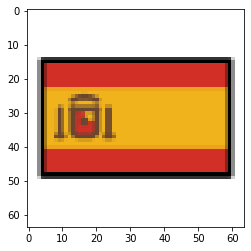

In [7]:
from TripletSVGData import *
import json
from treeOps import *
import matplotlib.pyplot as plt
from osTools import *

with open('commonConfig.json') as fd : 
    commonConfig = json.load(fd)
   
# Load one data point.
dataDir = commonConfig['val_directory']
dataPts = map(listdir, listdir(dataDir))
removeTxt = lambda x : filter(lambda y : not y.endswith('txt'), x)
dataPts = list(map(lambda x : list(removeTxt(reversed(x))), dataPts))
pt = dataPts[13]

# load data and check if it is correct
gtTree = TripletSVGData(*pt)
checkImg = gtTree.alphaComposite(tuple(leaves(gtTree)))
plt.imshow(checkImg)
plt.show()

## Inferred Hierarchies for different methods

1. Greedy Tree
2. Greedy Binary Tree
3. KD-Tree based inference strategy
4. Suggero

### Greedy Tree

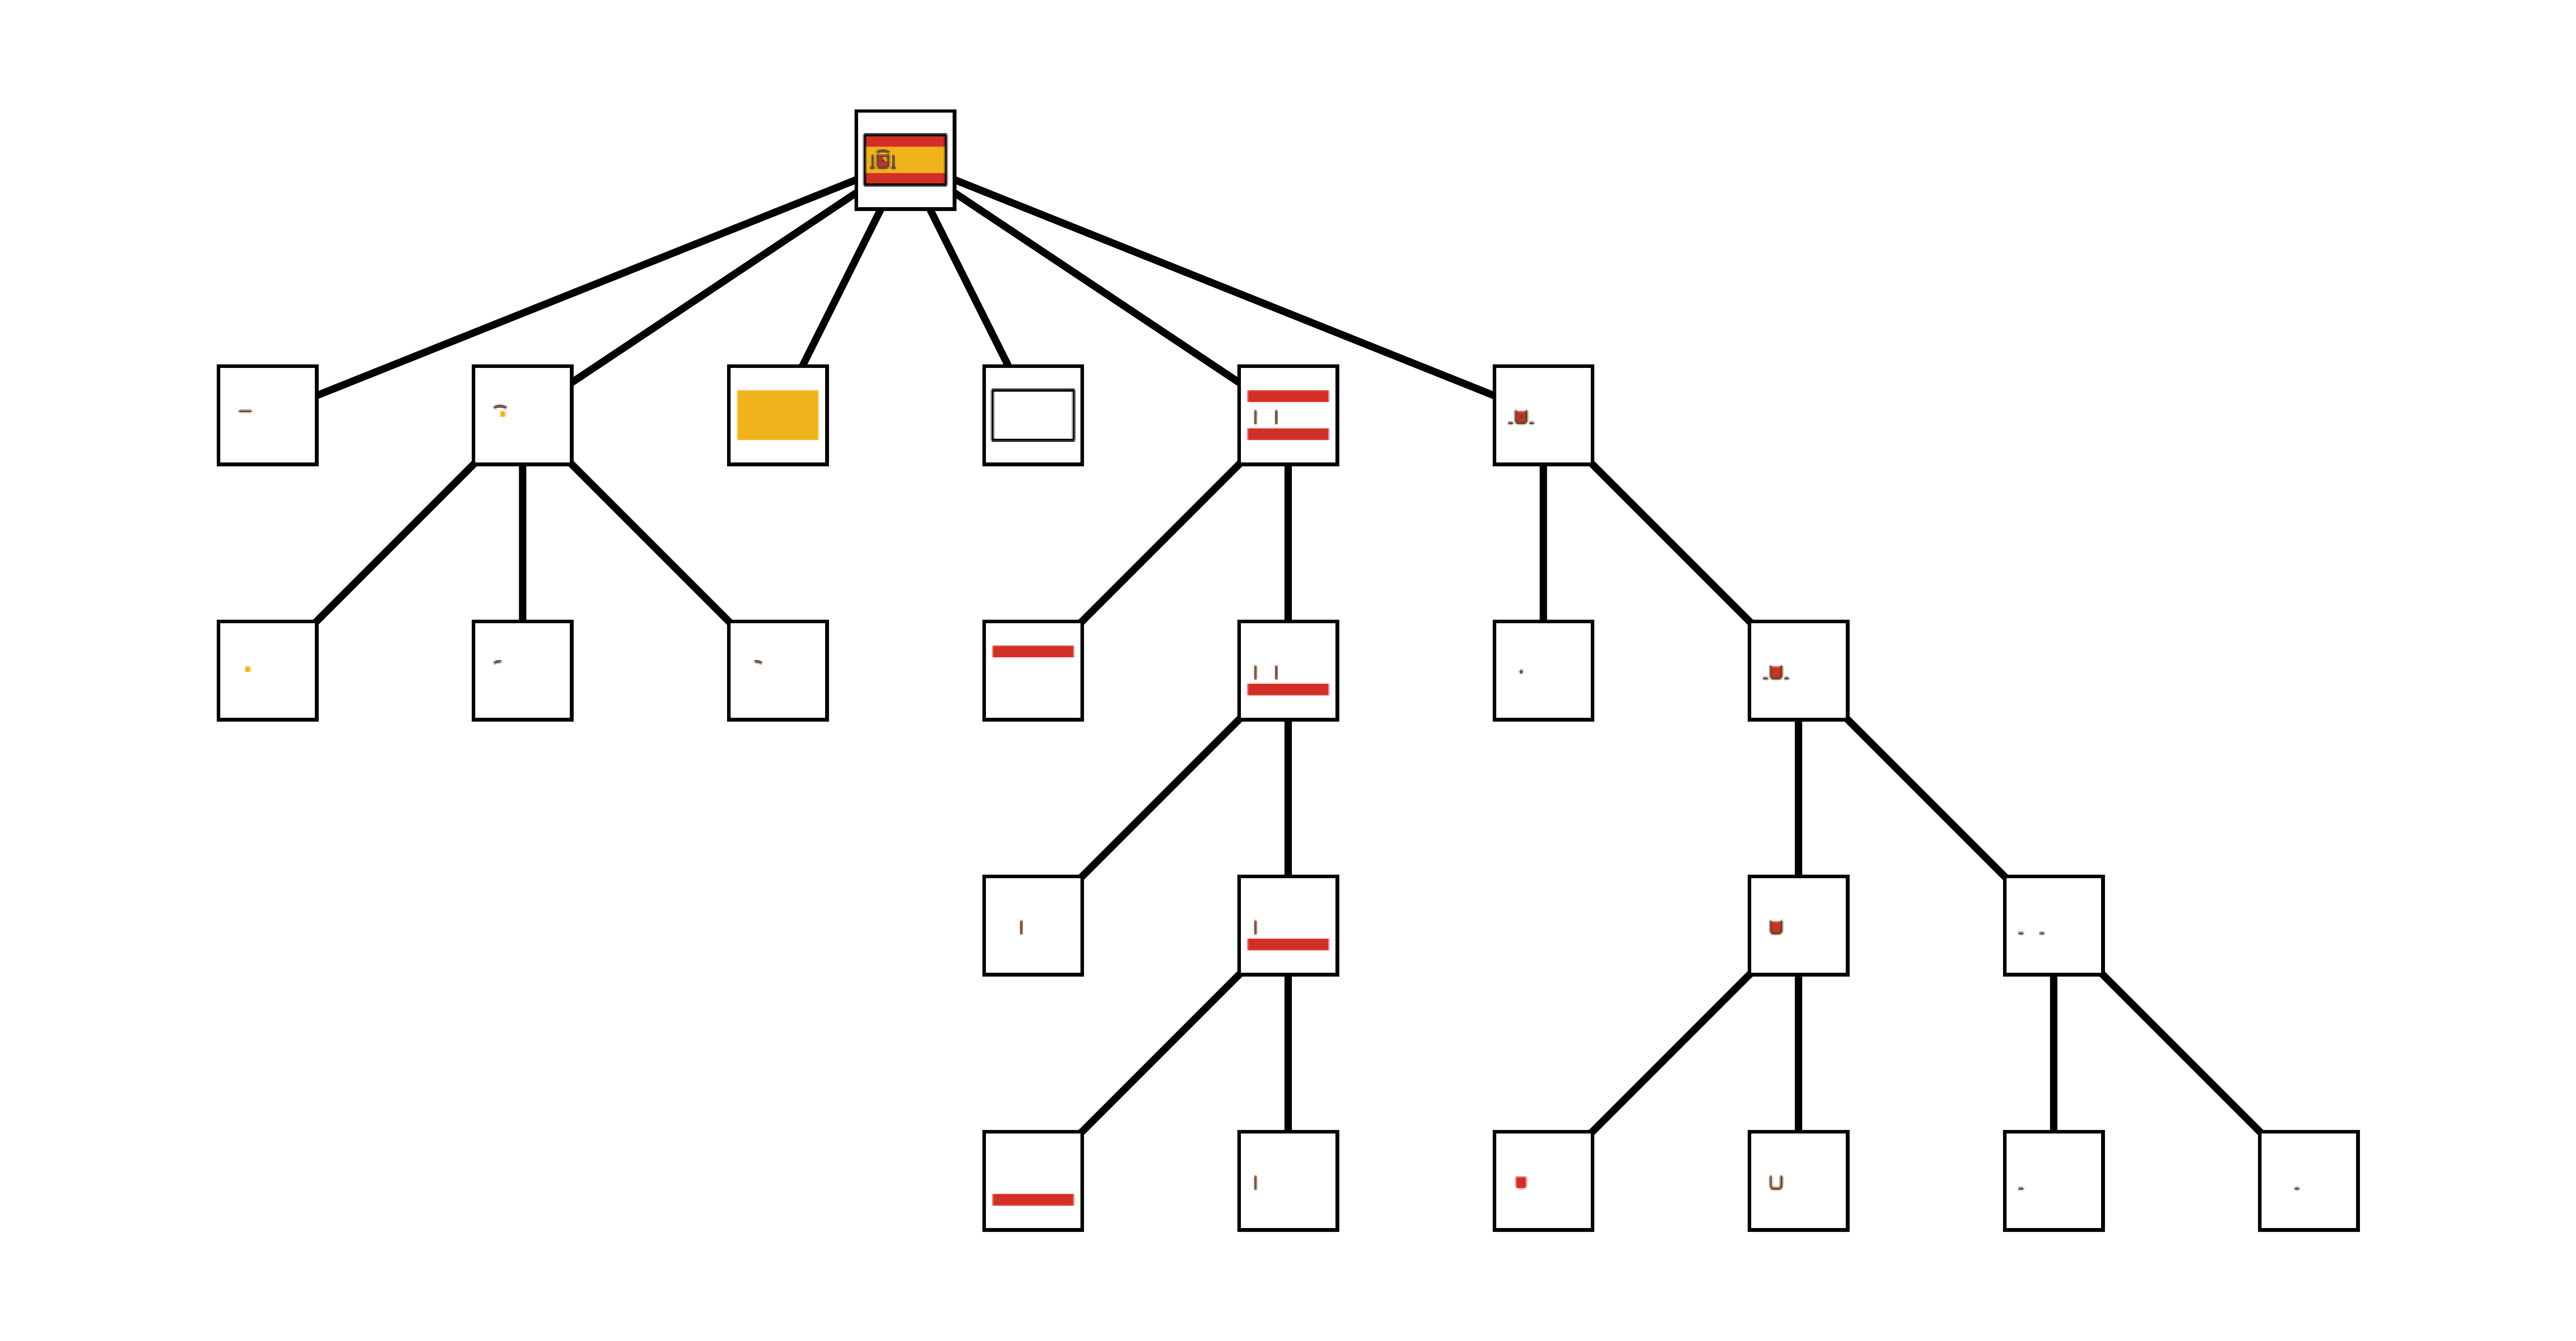

In [8]:
from Triplet import * 

# Load model and visualize inferred hierarchy.
model = getModel('bam_resnet_suggero')
tree = model.greedyTree(gtTree)
figure, ax = fillSVG(gtTree, tree)
figure.show()

### Greedy Binary Tree

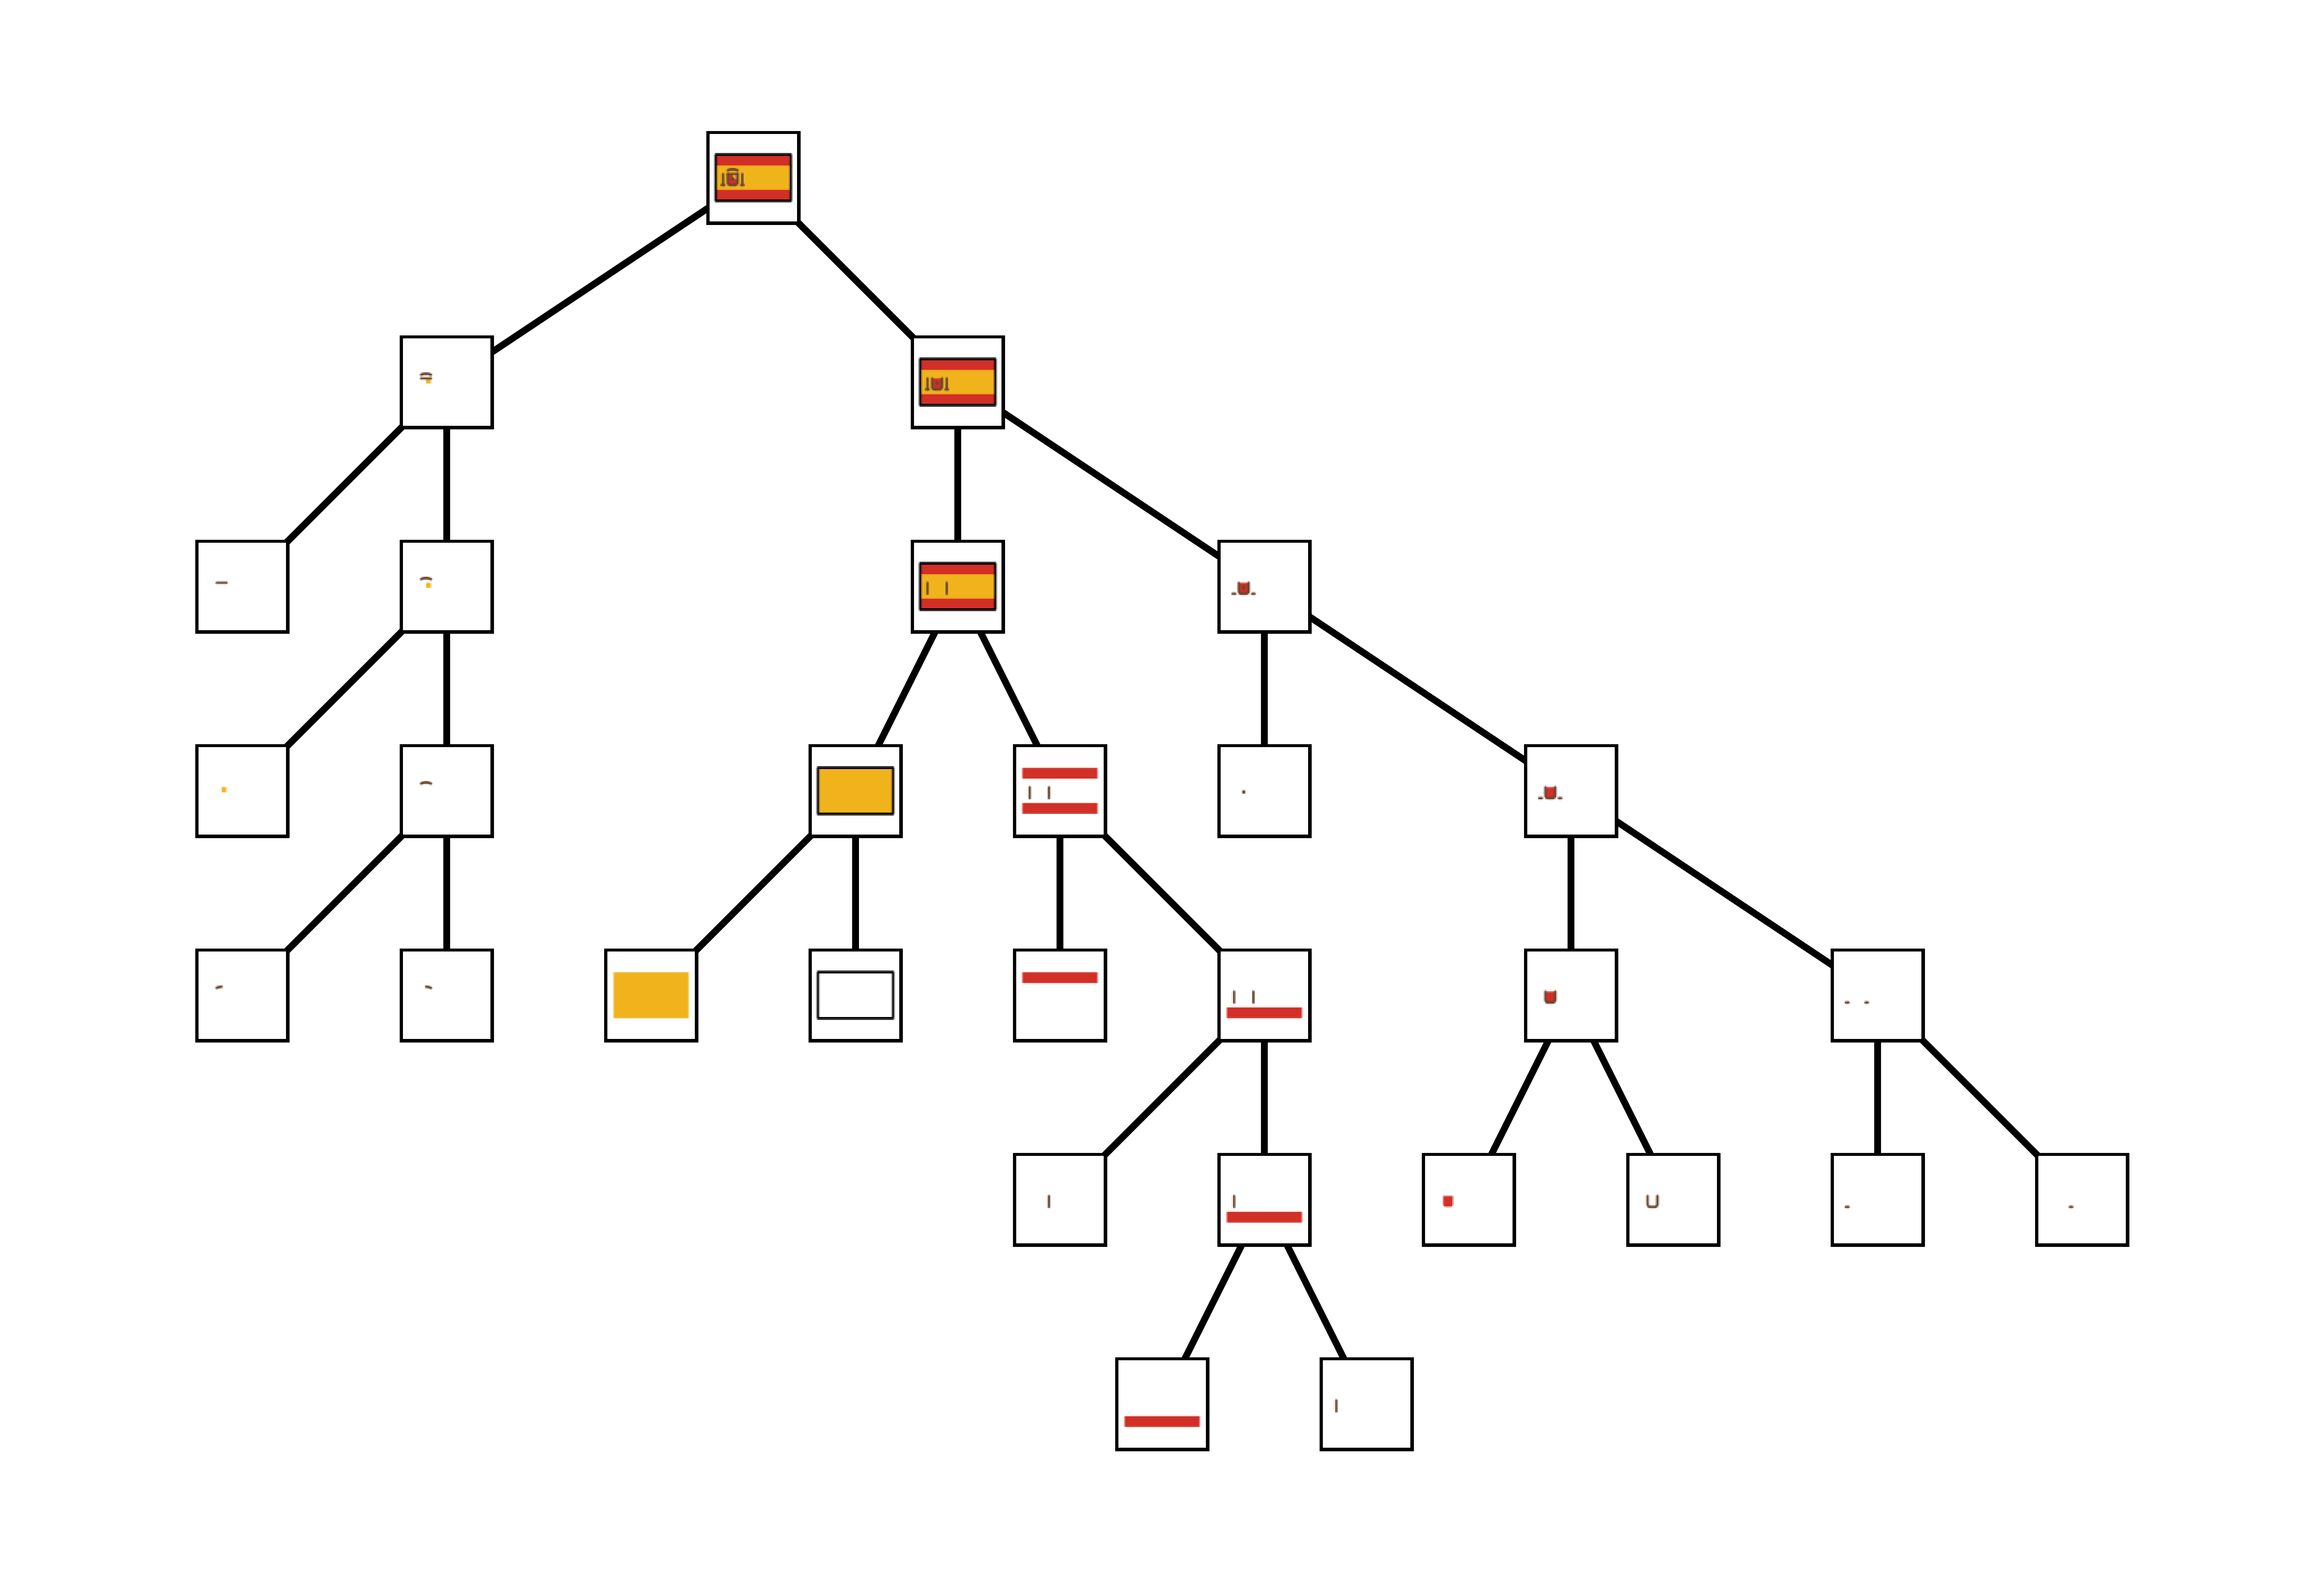

In [9]:
tree = model.greedyTree(gtTree, binary=True)
figure, ax = fillSVG(gtTree, tree)
figure.show()

### Suggero

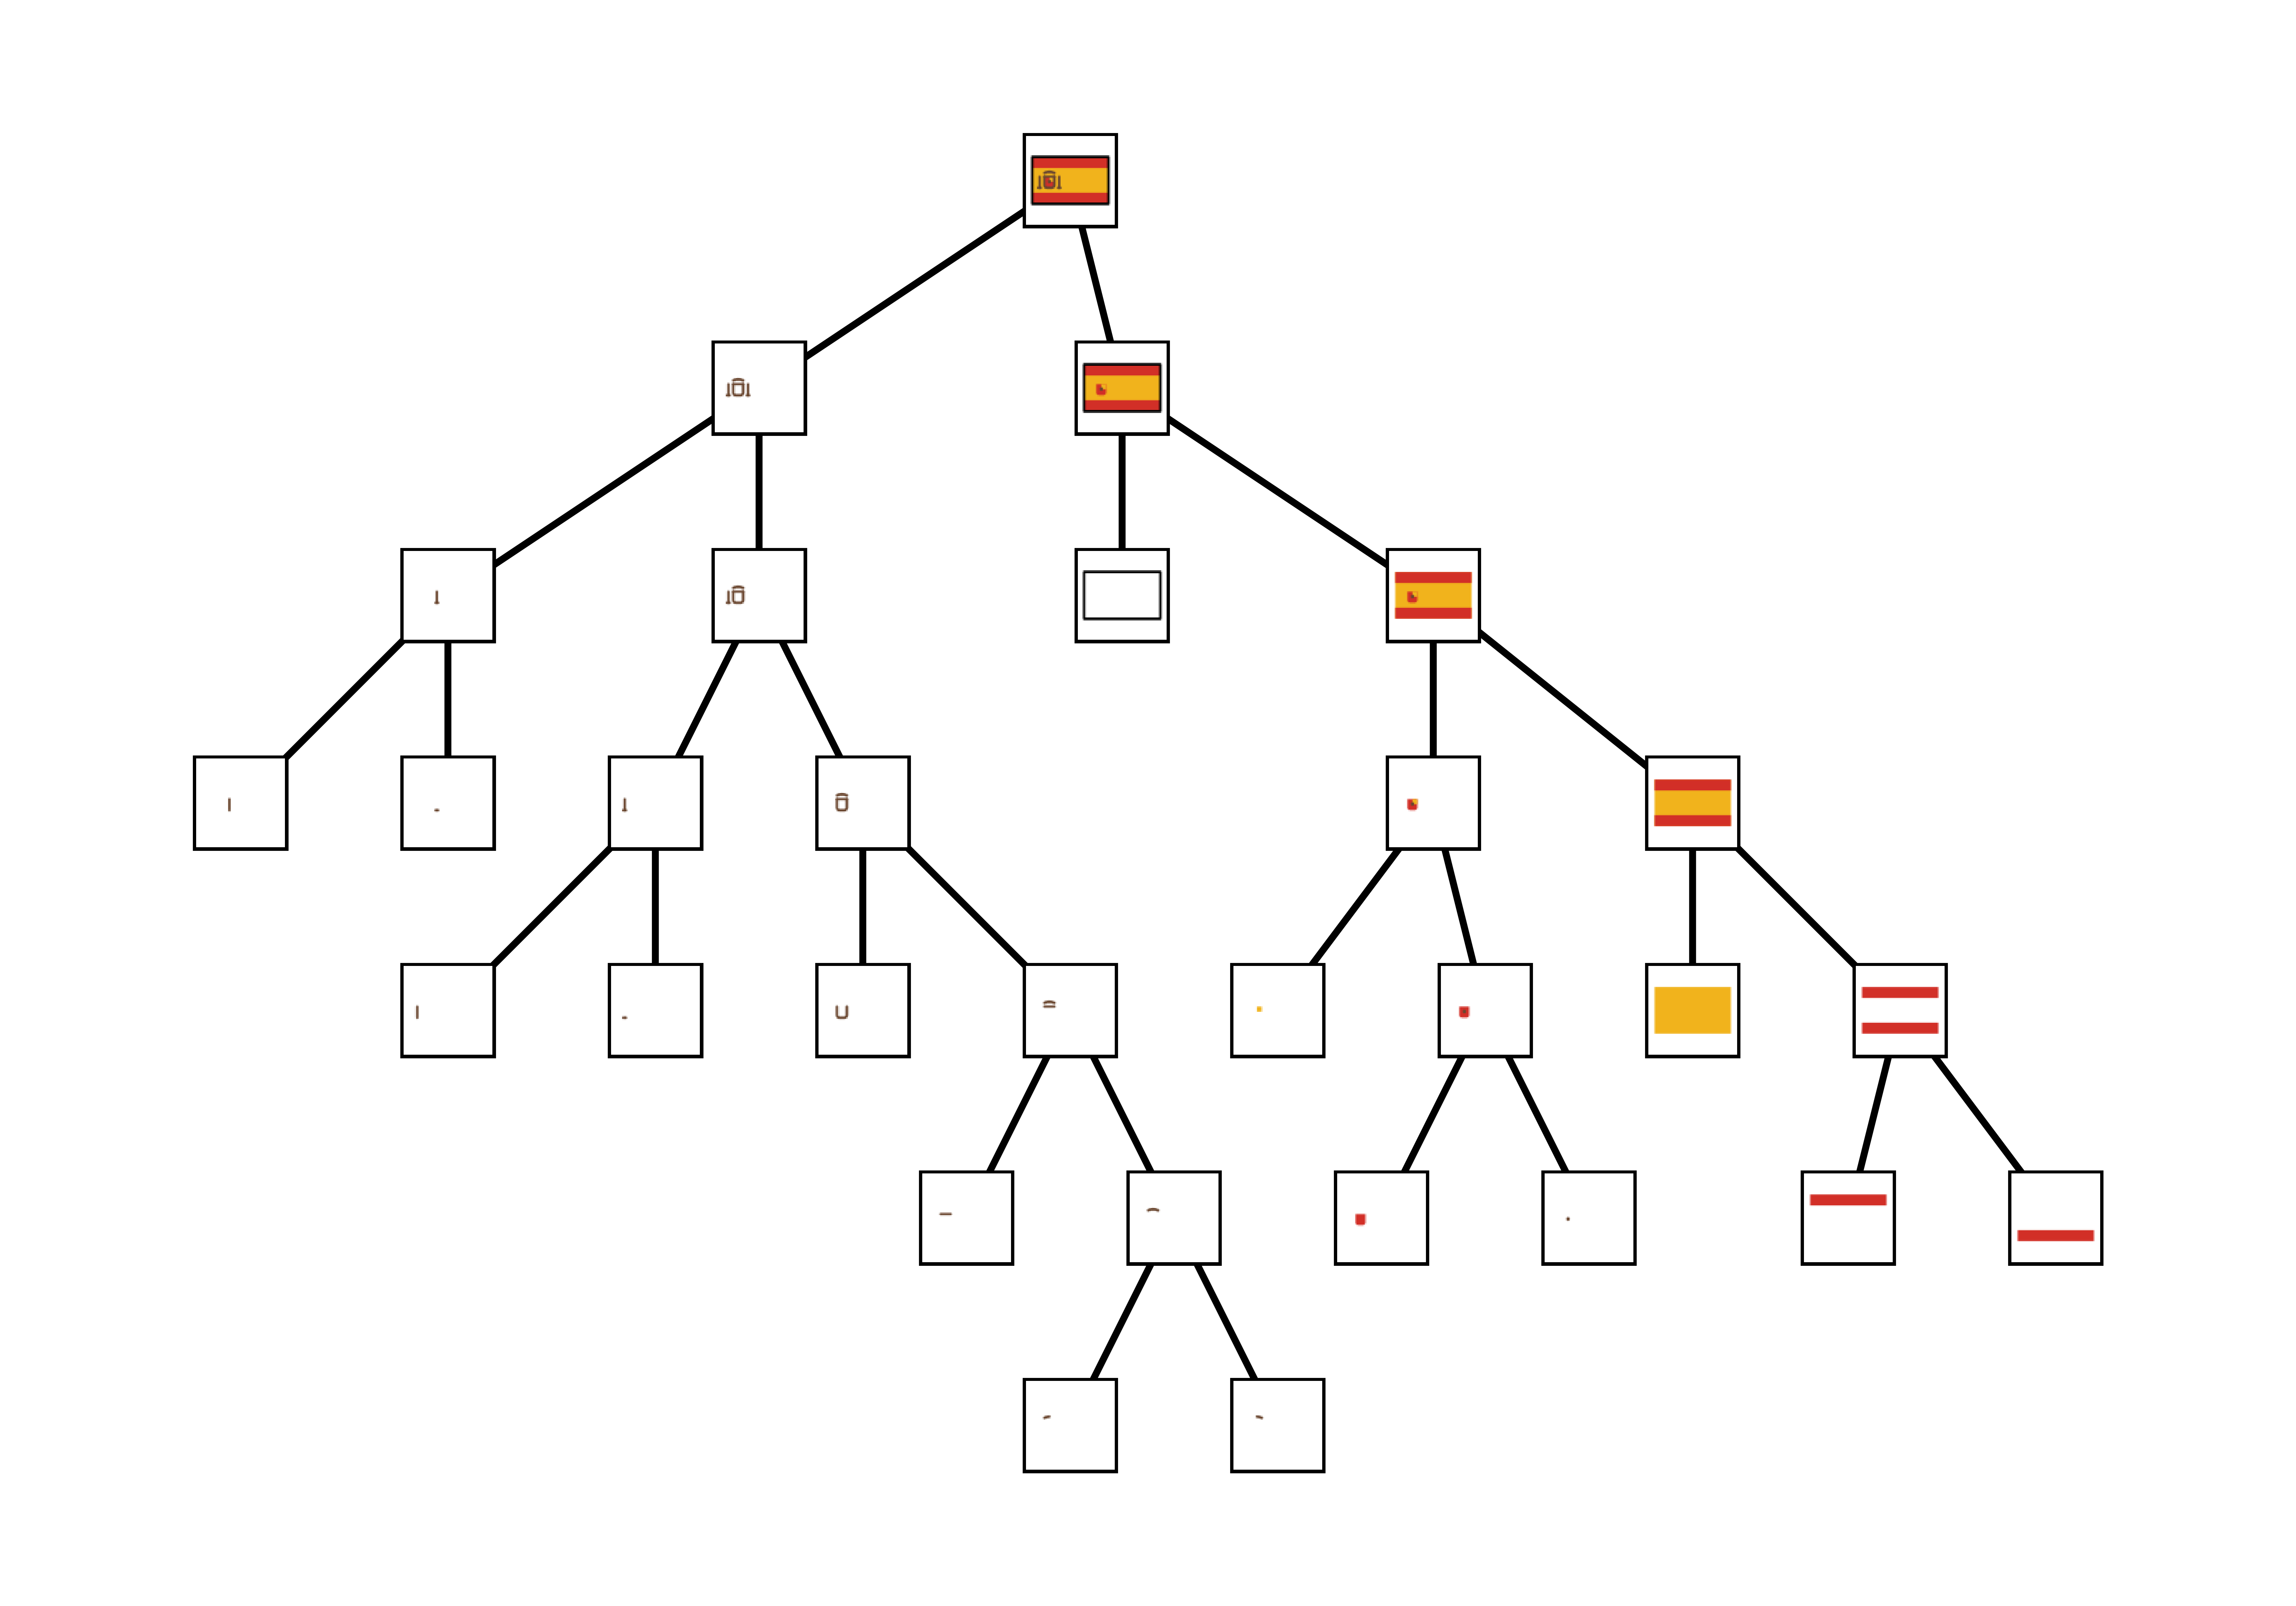

In [10]:
from suggero import suggero

suggeroTree = suggero(gtTree.svgFile)
figure, ax = fillSVG(gtTree, suggeroTree)
size = figure.get_size_inches()*figure.dpi
figure.show()

## Embedding Space Visualization

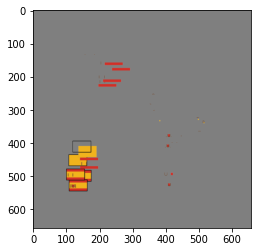

In [12]:
from sklearn.manifold import TSNE
from vis import *
import torch

pathSets = [tuple(tree.nodes[n]['pathSet']) for n in tree.nodes]
allEmbeddings = [getEmbedding(gtTree, ps, model.embedding) for ps in pathSets]
ims = [gtTree.alphaComposite(ps) for ps in pathSets]
m = TSNE(n_components=2, perplexity=5)
allEmbeddings = [em.detach().cpu().numpy() for em in allEmbeddings]
allEmbeddings = np.concatenate(allEmbeddings, axis=0)
x = m.fit_transform(allEmbeddings)
canvas = putOnCanvas(x, ims)
plt.imshow(canvas)
plt.savefig('o.png')
# plt.show()